# 1. 라이브러리 및 데이터

In [74]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier # 랜덤 포레스트 불러오기

In [75]:
# 데이터 불러오기
train = pd.read_csv('./data/train.csv') # 모델 학습 파일
test = pd.read_csv('./data/test.csv') # 모델 시험지 파일
submission = pd.read_csv('./data/submission.csv') # 답안지 파일

In [76]:
train.head()
# id: 날짜와 시간별 id
# hour: 시간
# hour_bef_temperature: 1시간 전 기온
# hour_bef_precipitation: 1시간 전 비 정보, 비가오지 않았으면 0, 비가 오면 1
# hour_bef_windspeed: 1시간 전 풍속(평균)
# hour_bef_humidity : 1시간 전 습도
# hour_bef_visibility: 1시간 전 시정, 시계(특정 기상 상태에 따른 가시성을 의미)
# hour_bef_ozone: 1시간 전 오존
# hour_bef_pm10: 1시간 전 미세먼지(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)
# hour_bef_pm2.5: 1시간 전 미세먼지(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)
# count: 시간에 따른 따릉이 대여수

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


In [77]:
train.shape, test.shape, submission.shape

((1459, 11), (715, 10), (715, 2))

In [78]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


# 데이터 전처리

In [79]:
train.isna().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [80]:
# 'hour_bef temperature' 열의 결측치를 평균값으로 대체함.
train['hour_bef_temperature'] = train['hour_bef_temperature'].fillna(value=train['hour_bef_temperature'].mean())

In [81]:
train.isna().sum()

id                          0
hour                        0
hour_bef_temperature        0
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [82]:
train_isna_sum = train.isna().sum()

In [83]:
train_isna_sum[train_isna_sum != 0].index

Index(['hour_bef_precipitation', 'hour_bef_windspeed', 'hour_bef_humidity',
       'hour_bef_visibility', 'hour_bef_ozone', 'hour_bef_pm10',
       'hour_bef_pm2.5'],
      dtype='object')

In [84]:
# 시리즈 객체의 0이아닌 값(결측치)의 인덱스를 반환
na_columns = train_isna_sum[train_isna_sum != 0].index

In [85]:
# 결측치를 해당 열의 평균값으로 대체하는 함수.
def fill_bicycle_na(df, column):
    df[column] = df[column].fillna(value = df[column].mean())

In [86]:
# 결측치가 존재하는 열들의 결측치 값을 해당 열의 평균값으로 대체함.
for col in na_columns:
    fill_bicycle_na(train, col)
    print(col, '결측값 대체 완료')

hour_bef_precipitation 결측값 대체 완료
hour_bef_windspeed 결측값 대체 완료
hour_bef_humidity 결측값 대체 완료
hour_bef_visibility 결측값 대체 완료
hour_bef_ozone 결측값 대체 완료
hour_bef_pm10 결측값 대체 완료
hour_bef_pm2.5 결측값 대체 완료


In [87]:
train.isna().sum() # 결측치 없음.

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
count                     0
dtype: int64

In [88]:
test_isna_sum = test.isna().sum()

In [89]:
test_na_columns = test_isna_sum[test_isna_sum != 0].index

In [90]:
# test 데이터 결측치 채우기
for col in test_na_columns:
    fill_bicycle_na(test, col)
    print(col, '결측값 대체 완료')

hour_bef_temperature 결측값 대체 완료
hour_bef_precipitation 결측값 대체 완료
hour_bef_windspeed 결측값 대체 완료
hour_bef_humidity 결측값 대체 완료
hour_bef_visibility 결측값 대체 완료
hour_bef_ozone 결측값 대체 완료
hour_bef_pm10 결측값 대체 완료
hour_bef_pm2.5 결측값 대체 완료


In [91]:
test.isna().sum() #결측값 없음

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
dtype: int64

# 변수 선택 및 모델 구축

##### K-NN Regression(K-최근접 이웃 회귀)
##### 주변의 가장 가까운 K개의 샘플을 통해 값(임의의 '숫자')을 예측하는 방식
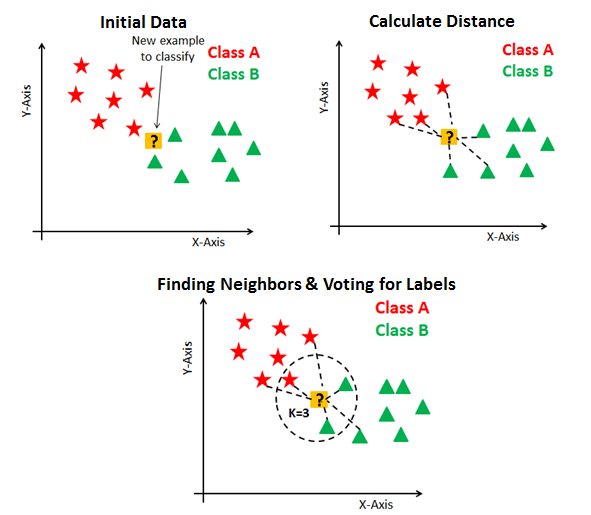


In [104]:
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [93]:
model = KNeighborsRegressor(n_jobs = -1)

In [94]:
column = ['hour', 'hour_bef_temperature']
X_train = train[column]
y_train = train['count']
X_test = test[column]

In [95]:
model_5 = KNeighborsRegressor(n_jobs = -1, n_neighbors = 5) # 이웃의 수 5
model_7 = KNeighborsRegressor(n_jobs = -1, n_neighbors = 7) # 이웃의 수 7
model_9 = KNeighborsRegressor(n_jobs = -1, n_neighbors = 9) # 이웃의 수 9


In [108]:
kfold = KFold(n_splits = 5, shuffle =True, random_state = 10) # KFold 교차 검증

In [114]:
np.mean(cross_val_score(model_5, X_train, y_train, cv = kfold, scoring = 'neg_mean_squared_error'))


-2154.0119004848657

In [115]:
np.mean(cross_val_score(model_7, X_train, y_train, cv = kfold, scoring = 'neg_mean_squared_error'))

-2053.407982413414

In [116]:

np.mean(cross_val_score(model_9, X_train, y_train, cv = kfold, scoring = 'neg_mean_squared_error'))

-1987.690754979273

In [124]:
model_9.fit(X_train, y_train)

KNeighborsRegressor(n_jobs=-1, n_neighbors=9)

In [128]:
submission['count']=model_9.predict(X_test)

In [134]:
submission

,id,count
0,0,159.111111
1,1,259.666667
2,2,118.333333
3,4,100.111111
4,5,130.333333
...,...,...
710,2148,77.777778
711,2149,58.000000
712,2165,104.000000
713,2166,205.444444


##### 랜덤포레스트 모형
##### :예측을 위해 여러 결정 트리를 결합하는 일종의 앙상블 학습 방법(많은 수의 결정 트리를 구축 후 예측을 평균하여 최종 예측을 얻는다.)
##### -회귀작업 모델: 연속 출력 변수를 예측
##### -분류작업 모델: 범주형 출력 변수를 예측
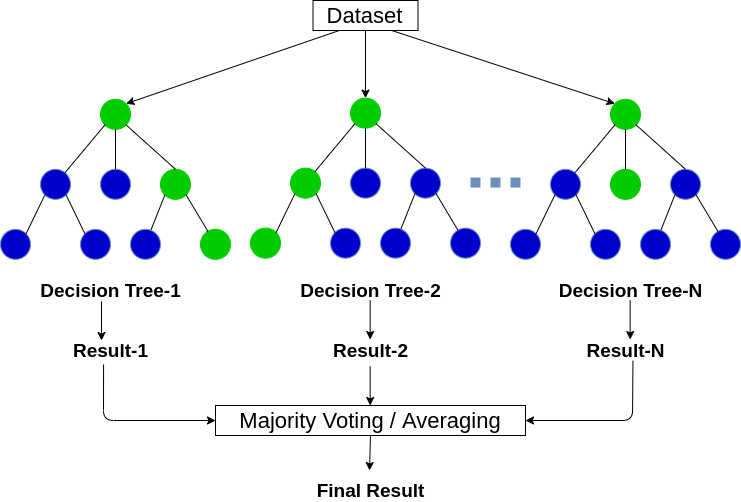

In [135]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [137]:
X_train = train.drop(['id', 'count'], axis = 1)
y_train = train['count']
X_test = test.drop('id', axis = 1)

In [139]:
X_train.shape, y_train.shape, X_test.shape

((1459, 9), (1459,), (715, 9))

In [142]:
from sklearn.model_selection import GridSearchCV

In [147]:
param = {'min_samples_split': [30, 50, 70],
    'max_depth': [5,6,7],
    'n_estimators': [50, 150, 250]} # 하이퍼파라미터 튜닝

In [156]:
gs = GridSearchCV(estimator = model, param_grid = param, scoring = 'neg_mean_squared_error', cv = 3)

In [157]:
gs.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 6, 7],
                         'min_samples_split': [30, 50, 70],
                         'n_estimators': [50, 150, 250]},
             scoring='neg_mean_squared_error')

In [158]:
gs.predict(X_test)

array([ 83.99821829, 238.52546037,  80.71658456,  31.05569989,
        41.46610036, 121.76056451, 169.54651939, 301.45767712,
        29.33677719,  98.89302652, 292.06729142, 244.82517534,
       114.19821597,  40.09003409, 236.62246546, 154.33096961,
        24.93592234, 205.1216915 , 308.80785489, 156.33683532,
       217.60837334,  74.15494595,  18.86102786, 134.66073562,
       144.94589347, 108.94452346,  24.61391878, 113.86867405,
       107.43720471, 149.54007025,  85.48032463,  25.46973979,
        63.5864547 , 133.86035378, 260.17520592,  28.13451685,
       137.43441507,  84.60473398, 214.37781941,  70.91197173,
        61.16867364, 116.41080037, 165.33464561,  82.41564464,
       302.41340711, 197.37515202,  73.52442647,  63.37782038,
        18.76680415,  87.32700493, 246.91897476,  86.31250934,
       159.77561207,  49.06726384, 187.58821176, 159.86192094,
        40.87083518, 174.07859372,  18.71764578,  18.00322212,
        87.47330913,  86.3569286 , 265.72926275, 290.78

In [160]:
gs.best_params_

{'max_depth': 7, 'min_samples_split': 30, 'n_estimators': 250}

In [167]:
pd.DataFrame(gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.125866,0.017226,0.006314,0.000446,5,30,50,"{'max_depth': 5, 'min_samples_split': 30, 'n_e...",-2088.116574,-1769.313343,-1832.993825,-1896.807914,137.751113,15
1,0.351940,0.024687,0.014875,0.001474,5,30,150,"{'max_depth': 5, 'min_samples_split': 30, 'n_e...",-2085.765871,-1775.916263,-1796.306086,-1885.996073,141.503628,10
2,0.553355,0.026956,0.025061,0.002494,5,30,250,"{'max_depth': 5, 'min_samples_split': 30, 'n_e...",-2097.191936,-1783.770235,-1769.307298,-1883.423157,151.272629,9
3,0.104105,0.002488,0.005466,0.000703,5,50,50,"{'max_depth': 5, 'min_samples_split': 50, 'n_e...",-2142.095244,-1848.336920,-1854.218902,-1948.217022,137.113634,18
4,0.302004,0.004127,0.013635,0.000035,5,50,150,"{'max_depth': 5, 'min_samples_split': 50, 'n_e...",-2168.674837,-1836.936802,-1803.986161,-1936.532600,164.699626,16
5,0.494076,0.004288,0.022272,0.000275,5,50,250,"{'max_depth': 5, 'min_samples_split': 50, 'n_e...",-2157.296122,-1836.318538,-1821.388137,-1938.334266,154.949347,17
6,0.105164,0.010805,0.005995,0.000828,5,70,50,"{'max_depth': 5, 'min_samples_split': 70, 'n_e...",-2289.226006,-1919.298494,-1826.167043,-2011.563848,199.984287,26
7,0.300163,0.010754,0.013915,0.000396,5,70,150,"{'max_depth': 5, 'min_samples_split': 70, 'n_e...",-2276.745411,-1926.381020,-1860.650726,-2021.259052,182.638217,27
8,0.504529,0.012734,0.024819,0.002217,5,70,250,"{'max_depth': 5, 'min_samples_split': 70, 'n_e...",-2286.746871,-1900.202861,-1844.769842,-2010.573191,196.591168,25
9,0.111560,0.000580,0.005998,0.000019,6,30,50,"{'max_depth': 6, 'min_samples_split': 30, 'n_e...",-1958.571269,-1681.762598,-1788.526785,-1809.620217,113.986724,5


In [168]:
from sklearn.model_selection import RandomizedSearchCV

In [171]:
param = {
    'min_samples_split': range(30,70),
    'max_depth': [5,6,7],
    'n_estimators': range(50,250)
}

In [172]:
model = RandomForestRegressor()

In [173]:
rs = RandomizedSearchCV(estimator = model, param_distributions = param, n_iter = 30, random_state =0, scoring = 'neg_mean_squared_error', n_jobs=-1)

In [174]:
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestRegressor(), n_iter=30, n_jobs=-1,
                   param_distributions={'max_depth': [5, 6, 7],
                                        'min_samples_split': range(30, 70),
                                        'n_estimators': range(50, 250)},
                   random_state=0, scoring='neg_mean_squared_error')

In [176]:
rs.predict(X_test)

array([ 83.16984686, 240.96246813,  74.70204167,  30.30562678,
        42.45683856, 121.46768853, 181.29556527, 289.23150163,
        28.69840321, 101.6302836 , 288.47240813, 244.20102549,
       114.09187981,  39.29361365, 236.43779426, 155.73906784,
        24.75640382, 209.70990694, 301.6616099 , 166.88390581,
       220.11505939,  71.17548307,  19.12241243, 135.31996237,
       142.45280707, 109.73574019,  23.71530325, 116.90553764,
       108.61659758, 145.07631703,  81.30518919,  25.02348637,
        62.77832631, 132.16050162, 263.2501301 ,  28.11635966,
       131.92693076,  81.90043812, 217.38444926,  70.16801189,
        61.92999018, 117.83952985, 156.21778726,  80.54843654,
       298.08864977, 198.80669262,  72.18887481,  63.31834311,
        19.57392409,  84.03933039, 250.64818089,  82.63499896,
       149.12851308,  47.62620442, 193.11767489, 154.57805035,
        39.51733312, 176.08015731,  19.09200391,  18.30740552,
        86.16132915,  87.56118233, 263.34319443, 284.91

In [180]:
pd.DataFrame(rs.cv_results_).sort_values('mean_test_score', ascending = False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
21,1.045401,0.065568,0.044081,0.008012,171,34,7,"{'n_estimators': 171, 'min_samples_split': 34,...",-1683.773974,-1938.252549,-1552.253646,-1819.407779,-1495.085344,-1697.754659,164.365186,1
16,0.744960,0.022080,0.029586,0.005750,139,35,7,"{'n_estimators': 139, 'min_samples_split': 35,...",-1689.873111,-1967.292794,-1570.828141,-1836.955928,-1490.347655,-1711.059526,173.397132,2
29,0.427456,0.057474,0.011968,0.002443,80,42,7,"{'n_estimators': 80, 'min_samples_split': 42, ...",-1718.652916,-2013.973954,-1566.429161,-1879.891698,-1505.105976,-1736.810741,189.914873,3
17,1.322558,0.045540,0.046277,0.006003,233,44,7,"{'n_estimators': 233, 'min_samples_split': 44,...",-1728.052854,-1990.593709,-1622.106463,-1867.150926,-1516.221061,-1744.825003,169.095710,4
6,0.401126,0.026868,0.015759,0.001718,75,36,6,"{'n_estimators': 75, 'min_samples_split': 36, ...",-1712.330254,-2031.315708,-1636.407248,-1836.159685,-1524.741488,-1748.190877,174.131774,5
19,0.330116,0.016205,0.012566,0.001353,56,43,7,"{'n_estimators': 56, 'min_samples_split': 43, ...",-1679.114901,-2049.836079,-1582.747023,-1890.060612,-1553.306895,-1751.013102,190.368039,6
3,0.570473,0.036839,0.022939,0.004231,98,48,7,"{'n_estimators': 98, 'min_samples_split': 48, ...",-1750.397828,-2018.301793,-1619.760739,-1901.584284,-1525.733205,-1763.155570,179.642045,7
14,0.543213,0.040491,0.017578,0.007197,102,49,7,"{'n_estimators': 102, 'min_samples_split': 49,...",-1759.515703,-2014.816971,-1632.266120,-1882.698723,-1529.944868,-1763.848477,172.716041,8
2,0.516417,0.008929,0.024136,0.005964,95,39,6,"{'n_estimators': 95, 'min_samples_split': 39, ...",-1750.512624,-2003.363570,-1626.698645,-1897.472221,-1547.344313,-1765.078274,167.974520,9
18,1.001919,0.050932,0.041289,0.006004,177,41,6,"{'n_estimators': 177, 'min_samples_split': 41,...",-1728.541802,-2042.637853,-1667.347445,-1895.642566,-1545.935991,-1776.021131,174.583615,10


In [184]:
submission['count'] = rs.predict(X_test)

In [187]:
submission.to_csv('./data/results.csv', index=False) # csv로 결과제출